In [1]:
import pandas as pd
import numpy as np
#import matplotlib as plt

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

#Preprocessing
from sklearn.preprocessing import Imputer
import statsmodels.api as sm
from math import sqrt
#Standardization
from sklearn.preprocessing import StandardScaler

#Partioning
from sklearn.model_selection import train_test_split
#Metrics for measuring Performance
from sklearn import metrics #TODO--USed in many place
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

#Clustering
from scipy import stats
from sklearn.cluster import KMeans

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score

#Optimization of Model Accuracy
from sklearn.model_selection import GridSearchCV 

#Oversampling
from imblearn.over_sampling import SMOTE
from collections import Counter


#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#First time installation of lightgbm
!pip install --user lightgbm
import lightgbm as lgb
from sklearn.svm import SVC

In [2]:
from lightgbm import LGBMClassifier

In [3]:
import os
os.chdir("C:\\Users\\yongxin\\Desktop\\PythonDataScience\\project")
os.getcwd()

'C:\\Users\\yongxin\\Desktop\\PythonDataScience\\project'

In [4]:
df = pd.read_csv("Churn_Modelling.csv")

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [8]:
df.groupby(['Gender','Exited'])['Exited'].count()

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: Exited, dtype: int64

In [9]:
df.groupby(['HasCrCard','Exited'])['Exited'].count()

HasCrCard  Exited
0          0         2332
           1          613
1          0         5631
           1         1424
Name: Exited, dtype: int64

In [10]:
df.groupby(['Geography','Exited'])['Exited'].count()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64

In [11]:
df.groupby(['IsActiveMember','Exited'])['Exited'].count()

IsActiveMember  Exited
0               0         3547
                1         1302
1               0         4416
                1          735
Name: Exited, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

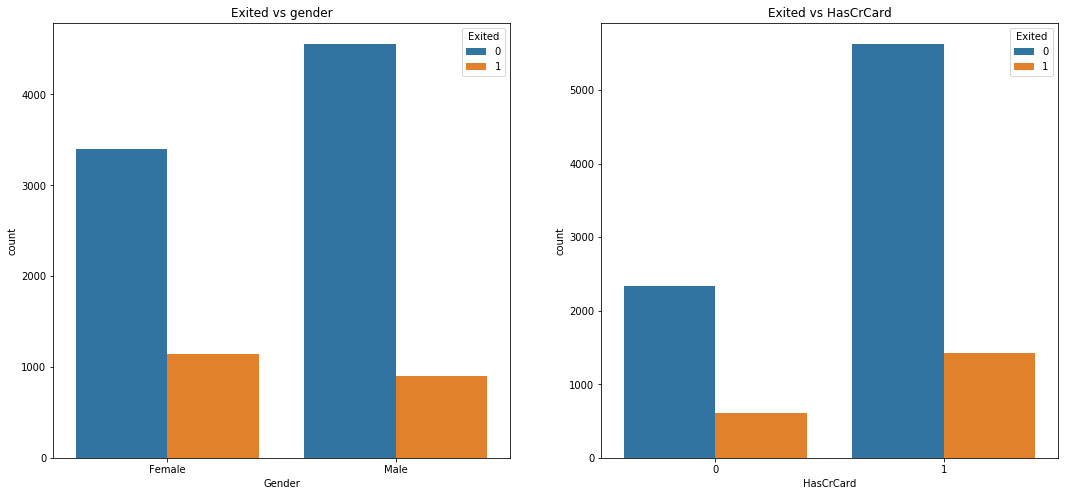

In [12]:
f,ax = plt.subplots(1,2,figsize = (18,8))
sns.countplot('Gender' , hue='Exited', data = df, ax = ax[0])
ax[0].set_title('Exited vs gender')
sns.countplot('HasCrCard', hue='Exited', data = df, ax = ax[1])
ax[1].set_title('Exited vs HasCrCard')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

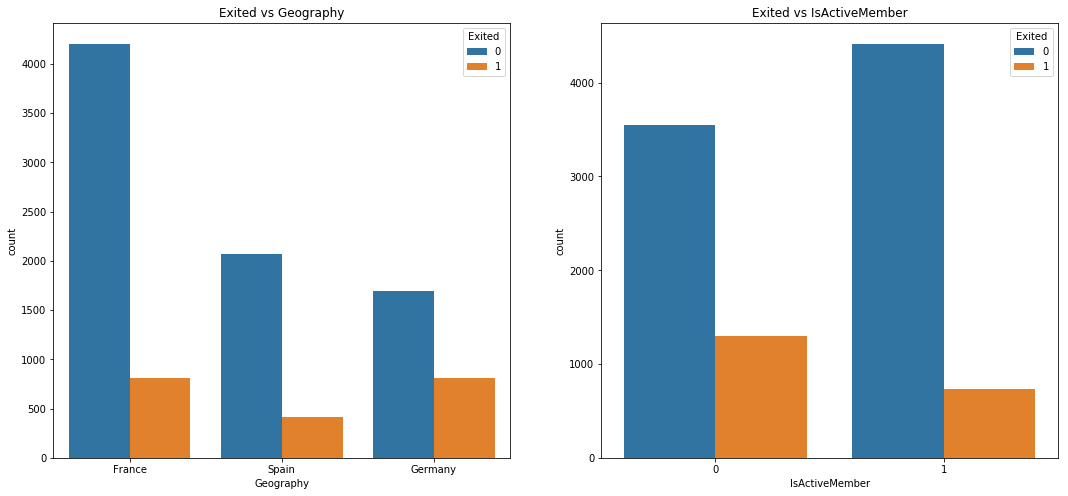

In [13]:
f,ax = plt.subplots(1,2,figsize = (18,8))
sns.countplot('Geography' , hue='Exited', data = df, ax = ax[0])
ax[0].set_title('Exited vs Geography')
sns.countplot('IsActiveMember', hue='Exited', data = df, ax = ax[1])
ax[1].set_title('Exited vs IsActiveMember')
plt.show

In [14]:
df['AgeGroups'] = pd.cut(df['Age'], [0, 20, 40, 60, 80,100], labels=['0-20','20-40','40-60','60-80','80-100'])

<function matplotlib.pyplot.show(*args, **kw)>

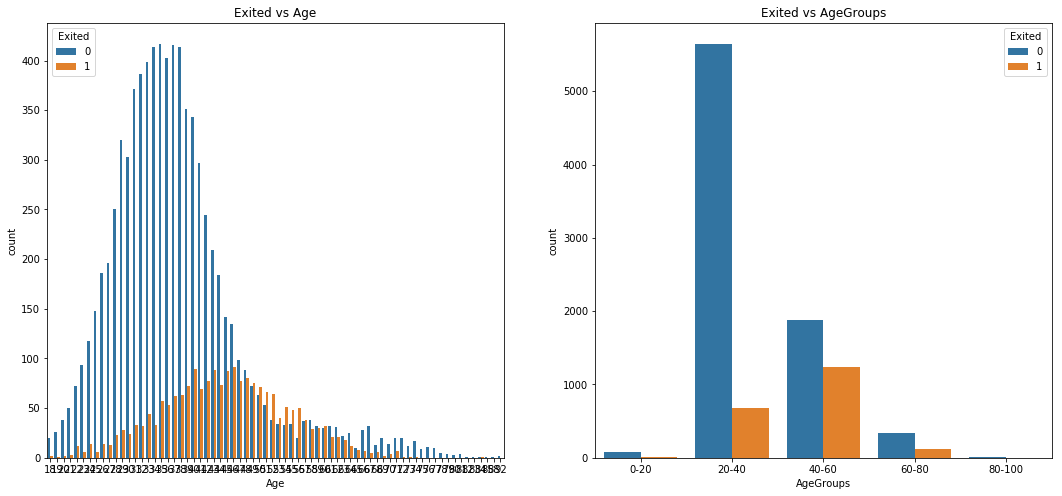

In [15]:
f,ax = plt.subplots(1,2,figsize = (18,8))
sns.countplot('Age', hue='Exited', data = df, ax = ax[0])
ax[0].set_title('Exited vs Age')
sns.countplot('AgeGroups', hue='Exited', data = df, ax = ax[1])
ax[1].set_title('Exited vs AgeGroups')
plt.show

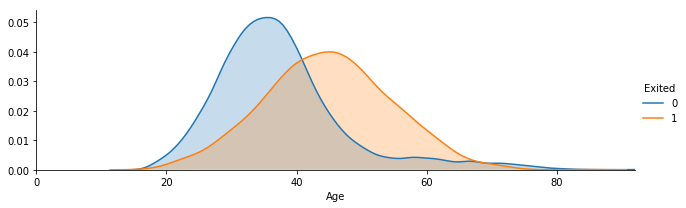

In [16]:
facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, df["Age"].max()))
facet.add_legend()

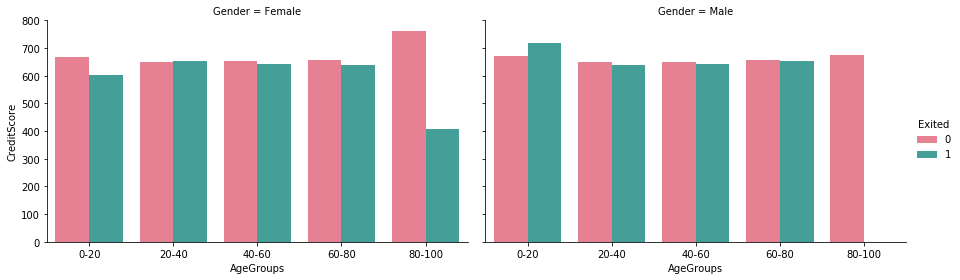

In [17]:
sns.catplot(x="AgeGroups", y="CreditScore", hue="Exited",col="Gender",data=df, ci=None, kind="bar",height=4, aspect=1.6,palette = "husl")

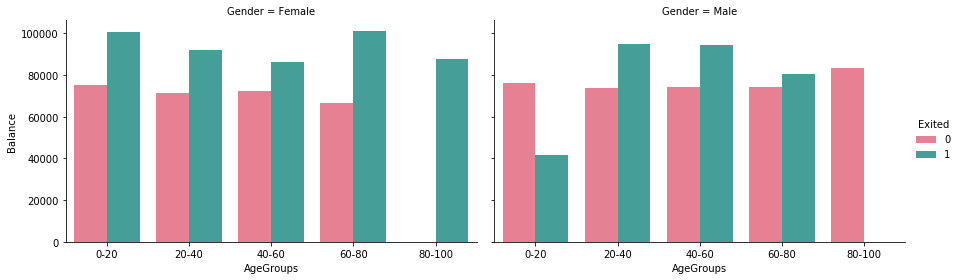

In [18]:
sns.catplot(x="AgeGroups", y="Balance", hue="Exited",col="Gender",data=df, ci=None, kind="bar",height=4, aspect=1.6,palette = "husl")

In [19]:
df.groupby(['AgeGroups','Exited'])['Exited'].count()

AgeGroups  Exited
0-20       0           84
           1            5
20-40      0         5649
           1          681
40-60      0         1881
           1         1236
60-80      0          338
           1          114
80-100     0           11
           1            1
Name: Exited, dtype: int64

In [20]:
pd.crosstab(df.AgeGroups,df.HasCrCard)

HasCrCard,0,1
AgeGroups,,
0-20,27,62
20-40,1823,4507
40-60,959,2158
60-80,132,320
80-100,4,8


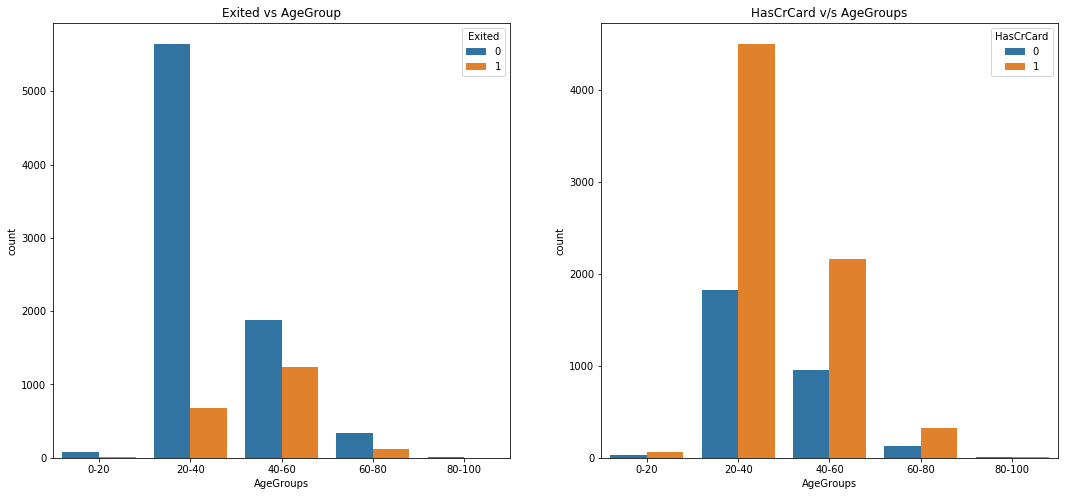

In [21]:
f,ax = plt.subplots(1,2,figsize = (18,8))
sns.countplot('AgeGroups' , hue='Exited', data = df, ax=ax[0])
ax[0].set_title('Exited vs AgeGroup')
sns.countplot('AgeGroups' , hue='HasCrCard', data = df, ax=ax[1])
ax[1].set_title('HasCrCard v/s AgeGroups')
plt.show()

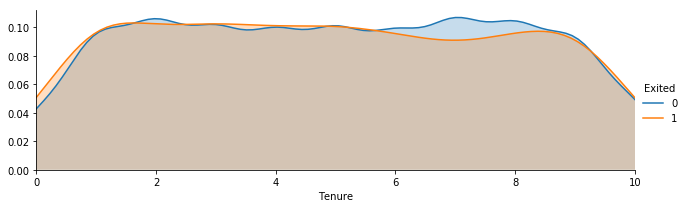

In [22]:
facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Tenure",shade= True)
facet.set(xlim=(0, df["Tenure"].max()))
facet.add_legend()

In [23]:
df_1 = pd.DataFrame()

In [24]:
df_1[['CreditScore', 'Age','Balance','EstimatedSalary']] = df[['CreditScore', 'Age','Balance','EstimatedSalary']]

In [25]:
df_1.head()

,CreditScore,Age,Balance,EstimatedSalary
0,619,42,0.00,101348.88
1,608,41,83807.86,112542.58
2,502,42,159660.80,113931.57
3,699,39,0.00,93826.63
4,850,43,125510.82,79084.10


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019737162128>,
      dtype=object)

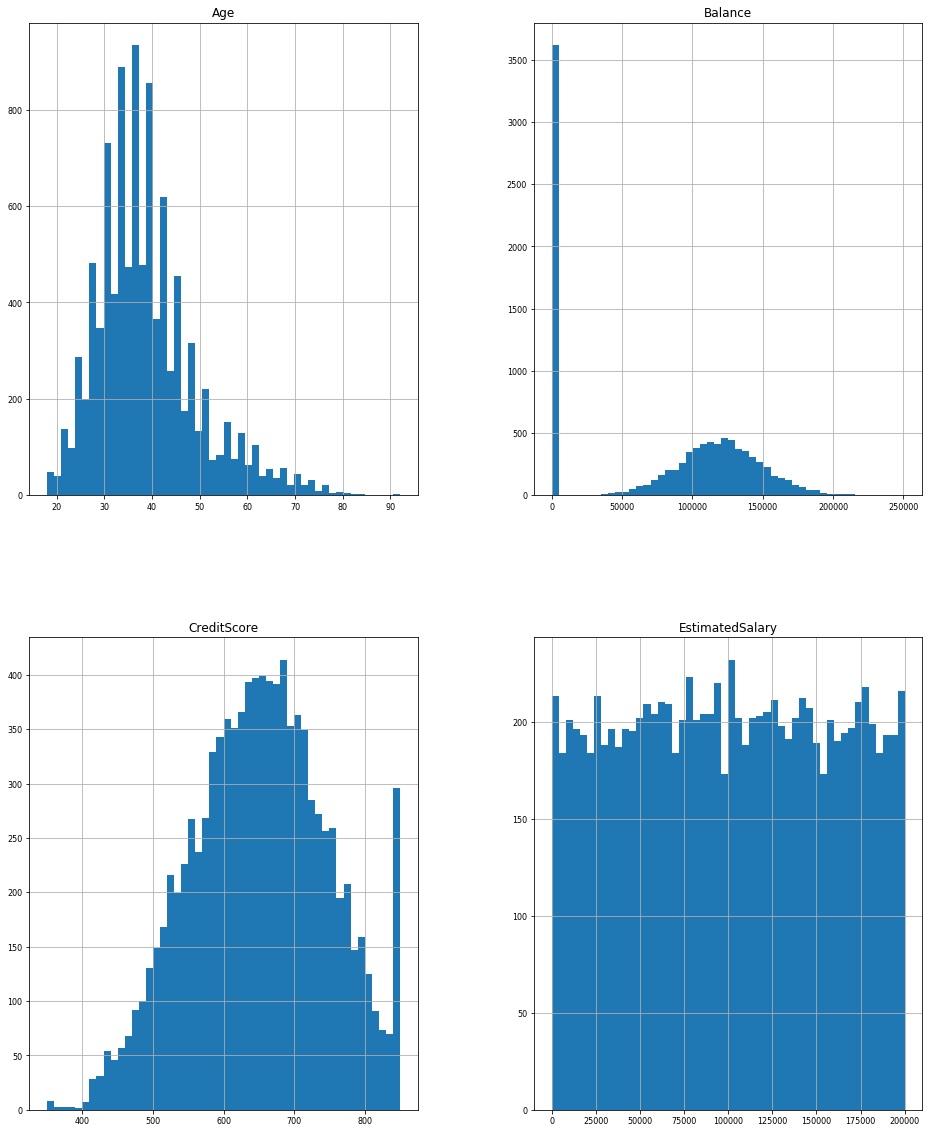

In [26]:
df_1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

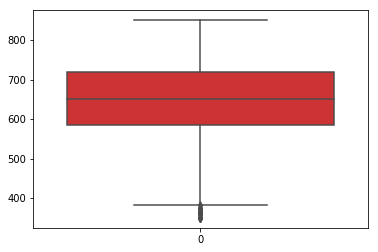

In [27]:
sns.boxplot(data = df_1.CreditScore, orient= 'V',palette = "Set1", linewidth = 1.5)

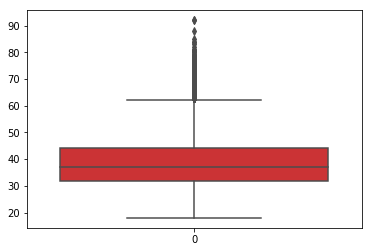

In [28]:
sns.boxplot(data = df_1.Age, orient= 'V',palette = "Set1", linewidth = 1.5)

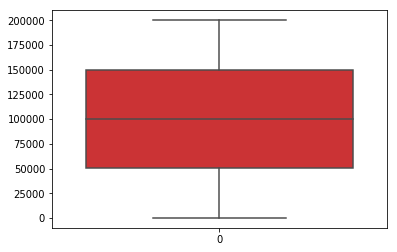

In [29]:
sns.boxplot(data = df_1.EstimatedSalary, orient= 'V',palette = "Set1", linewidth = 1.5)

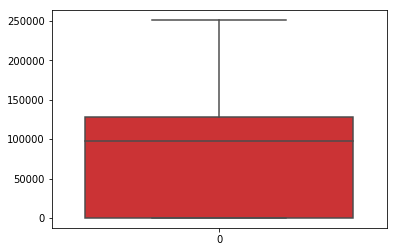

In [30]:
sns.boxplot(data = df_1.Balance, orient= 'V',palette = "Set1", linewidth = 1.5)

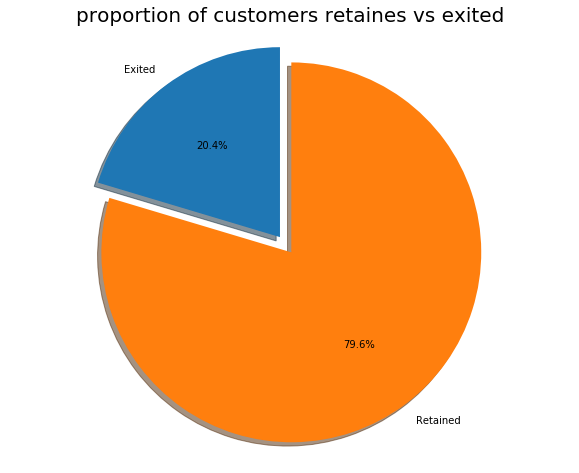

In [31]:
# proportion of customers retained vs exited
customers = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
labels = 'Exited','Retained'
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(customers, explode=explode,labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title("proportion of customers retaines vs exited", size = 20)
plt.show()

In [32]:
##Checking for unique values
np.unique(df.Geography)

array(['France', 'Germany', 'Spain'], dtype=object)

In [33]:
df['AgeBand'] = df['AgeGroups'].map( {'0-20' : 1, '20-40' : 2, '40-60': 3, '60-80': 4, '80-100': 5}).astype('int')

In [34]:
np.unique(df.NumOfProducts)

array([1, 2, 3, 4], dtype=int64)

In [35]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroups,AgeBand
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40-60,3
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-60,3
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-60,3
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,20-40,2
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-60,3


In [36]:
#dropping unwanted columns
df.drop(['RowNumber','CustomerId','Surname'],axis = 1,inplace = True)

In [37]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroups,AgeBand
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40-60,3
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-60,3
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-60,3
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,20-40,2
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-60,3


In [38]:
##Feature Engineering
df['BalanceSalaryRatio'] = df.Balance / df.EstimatedSalary

In [39]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroups,AgeBand,BalanceSalaryRatio
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40-60,3,0.000000
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-60,3,0.744677
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-60,3,1.401375
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,20-40,2,0.000000
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-60,3,1.587055


(-1, 5)

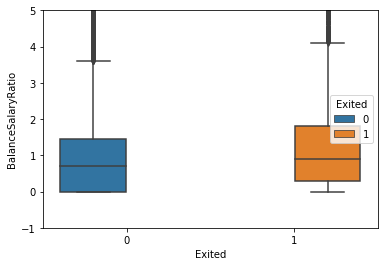

In [40]:
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 5)

In [41]:
df_geo = pd.get_dummies(df['Geography'])

In [42]:
df_gender = pd.get_dummies(df['Gender'])

In [43]:
df_new = pd.concat([df,df_geo,df_gender],axis=1)

In [44]:
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroups,AgeBand,BalanceSalaryRatio,France,Germany,Spain,Female,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40-60,3,0.000000,1,0,0,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-60,3,0.744677,0,0,1,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-60,3,1.401375,1,0,0,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,20-40,2,0.000000,1,0,0,1,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-60,3,1.587055,0,0,1,1,0


In [45]:
df_final = df_new.drop(['Geography','Gender','Age','AgeGroups','Female','Spain','BalanceSalaryRatio'],axis = 1)

In [46]:
df_final.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeBand,France,Germany,Male
0,619,2,0.00,1,1,1,101348.88,1,3,1,0,0
1,608,1,83807.86,1,0,1,112542.58,0,3,0,0,0
2,502,8,159660.80,3,1,0,113931.57,1,3,1,0,0
3,699,1,0.00,2,0,0,93826.63,0,2,1,0,0
4,850,2,125510.82,1,1,1,79084.10,0,3,0,0,0


In [47]:
sm_oversample = SMOTE(random_state=42)

In [48]:
X = df_final.drop(['Exited'],axis = 1)

In [49]:
y = df_final.Exited

In [50]:
X_sample, y_sample = sm_oversample.fit_resample(X,y) 

In [51]:
print("Original dataset shape %s" % Counter(y_sample))

Original dataset shape Counter({1: 7963, 0: 7963})


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_sample,y_sample,test_size = 0.3,random_state = 0)

In [53]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [54]:
#Clustering without target
clmns = ['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary','AgeBand', 'France','Germany','Spain','Female','Male']
df_new_std = stats.zscore(df_new[clmns])
kmeans = KMeans(n_clusters = 2,
                random_state = 0). fit(df_new_std)
labels = kmeans.labels_
df_new['clusters'] = labels
clmns.extend(['clusters'])
print(df_new[clmns].groupby(['clusters']).mean())

          CreditScore    Tenure       Balance  NumOfProducts  HasCrCard  \
clusters                                                                  
0          650.831389  4.966102  75659.369139       1.544134   0.702619   
1          650.276892  5.051677  77173.974506       1.518600   0.707898   

          IsActiveMember  EstimatedSalary   AgeBand    France   Germany  \
clusters                                                                  
0               0.502751    100601.541382  2.417345  0.497689  0.262602   
1               0.525380     99664.576931  2.379696  0.504490  0.241158   

             Spain  Female  Male  
clusters                          
0         0.239709     1.0   0.0  
1         0.254352     0.0   1.0  


In [55]:
#Clustering with target
clmns = ['CreditScore', 'Tenure', 'Balance', 'NumOfProducts',
         'HasCrCard', 'IsActiveMember', 'EstimatedSalary','AgeBand',
         'France','Germany','Spain','Female','Male','Exited']
df_new_std = stats.zscore(df_new[clmns])
kmeans = KMeans(n_clusters = 2,
                random_state = 0). fit(df_new_std)
labels = kmeans.labels_
df_new['clusters'] = labels
clmns.extend(['clusters'])
print(df_new[clmns].groupby(['clusters']).mean())

          CreditScore    Tenure       Balance  NumOfProducts  HasCrCard  \
clusters                                                                  
0          650.831389  4.966102  75659.369139       1.544134   0.702619   
1          650.276892  5.051677  77173.974506       1.518600   0.707898   

          IsActiveMember  EstimatedSalary   AgeBand    France   Germany  \
clusters                                                                  
0               0.502751    100601.541382  2.417345  0.497689  0.262602   
1               0.525380     99664.576931  2.379696  0.504490  0.241158   

             Spain  Female  Male    Exited  
clusters                                    
0         0.239709     1.0   0.0  0.250715  
1         0.254352     0.0   1.0  0.164559  


In [56]:
#Visualization of Confusion Matrix
def plotting_confusion_matrix(cnf_matrix):
    
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [57]:
lr = LogisticRegression(C=1000.0,random_state = 0)
lr.fit(X_train_std, y_train)

C:\Users\yongxin\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_pred = lr.predict(X_test_std)

In [59]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.72


In [60]:
confusion_matrix_lr = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

<function confusion_matrix at 0x0000019734002730>


In [61]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.442538
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Fri, 16 Aug 2019   Pseudo R-squ.:                  0.1245
Time:                        21:05:12   Log-Likelihood:                -4425.4
converged:                       True   LL-Null:                       -5054.9
                                        LLR p-value:                2.658e-264
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
CreditScore        -0.0034      0.000    -17.406      0.000      -0.004      -0.003
Tenure        

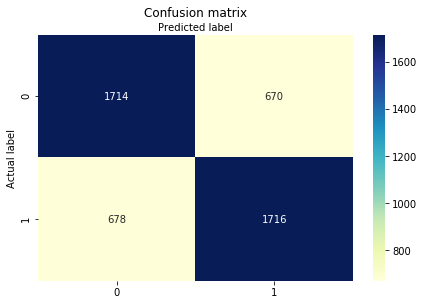

In [62]:
plotting_confusion_matrix(confusion_matrix_lr)

In [63]:
acc_model_lr = metrics.accuracy_score(y_test, y_pred)
acc_model_TP_lr = metrics.precision_score(y_test, y_pred)
acc_AUC_lr = metrics.roc_auc_score(y_test, y_pred)

print("Accuracy:", acc_model_lr)
print("Precision:",acc_model_lr)
print("Recall:",metrics.recall_score(y_test,y_pred))
print("R^2:",metrics.r2_score(y_test, y_pred))
print("AUC:",acc_AUC_lr)
print("Summary:", classification_report(y_test, y_pred))

Accuracy: 0.7178735872750105
Precision: 0.7178735872750105
Recall: 0.7167919799498746
R^2: -0.12851059415877497
AUC: 0.7178758557467494
Summary:               precision    recall  f1-score   support

           0       0.72      0.72      0.72      2384
           1       0.72      0.72      0.72      2394

    accuracy                           0.72      4778
   macro avg       0.72      0.72      0.72      4778
weighted avg       0.72      0.72      0.72      4778



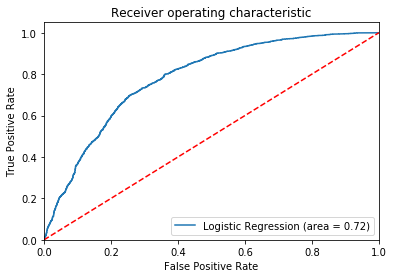

In [64]:
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test_std))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test_std)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

E:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


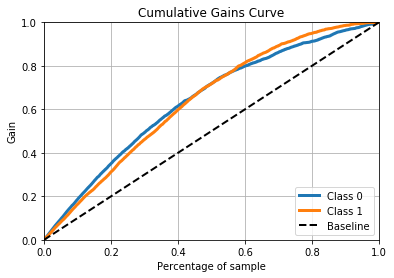

In [65]:
predicted_probas = lr.predict_proba(X_test_std)
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)

In [66]:
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [67]:
y_pred_svm = svm.predict(X_test_std)

In [68]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_svm))

Accuracy: 0.86


In [ ]:
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

confusion_matrix_svm

array([[2135,  249],
       [ 398, 1996]], dtype=int64)

In [ ]:
#k-fold cross validation
accuracies = cross_val_score(estimator = svm, X = X_train_std, y = y_train, cv = 10)

C:\Users\yongxin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\yongxin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\yongxin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\yongxin\Ap

In [ ]:
#On an average SVC can give an accuracy of 85.7% which can vary till 1%
print("K-fold Mean Accuracy::", accuracies.mean())

K-fold Mean Accuracy:: 0.8570168292378293


In [ ]:
print("K-fold Accuracy Standard Deviation Accuracy", accuracies.std())

K-fold Accuracy Standard Deviation Accuracy 0.009740054254510784


In [ ]:
parameters = [{'kernel': ['linear']}, 
              {'kernel': ['rbf'], 'gamma': np.arange(0.1,0.9,0.1)}] 


grid_search = GridSearchCV(estimator = svm,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5) 


In [ ]:
grid_search = grid_search.fit(X_train_std, y_train)

In [ ]:
best_accuracy = grid_search.best_score_ 

best_accuracy

In [ ]:
best_parameters = grid_search.best_params_ 

best_parameters

In [ ]:
#Re-modeling SVC with best parameters as returned by GridSearchCV

svm = SVC(kernel = 'rbf', gamma=0.8, random_state = 0)
svm.fit(X_train_std, y_train)

In [ ]:
y_pred_svm = svm.predict(X_test_std)

In [ ]:
#improved accuracy by 1%
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_svm))

In [ ]:
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

plotting_confusion_matrix(confusion_matrix_svm)

In [ ]:
acc_model_svm = accuracy_score(y_test, y_pred_svm)
acc_model_TP_svm = precision_score(y_test, y_pred_svm)
acc_AUC_svm = roc_auc_score(y_test, y_pred_svm)

print("Accuracy:", acc_model_svm) #Model's Overal Accuracy = 91.31%
print("Precision:",acc_model_svm)
print("Recall:",metrics.recall_score(y_test,y_pred_svm ))
print("R^2:",metrics.r2_score(y_test, y_pred_svm))
print("AUC:",acc_AUC_svm)
print("Summary:", classification_report(y_test, y_pred_svm))

In [ ]:
model_decision_tree = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
model_decision_tree.fit(X_train_std, y_train)

In [ ]:
decision_tree_y_pred = model_decision_tree.predict(X_test_std)

In [ ]:
acc_decision_tree = round(model_decision_tree.score(X_train_std, y_train) * 100, 2)
acc_decision_tree

In [ ]:
col_significance = pd.DataFrame(X.columns.delete(0))
col_significance.columns = ['X']
col_significance["Column_Contribution"] = pd.Series(model_decision_tree.feature_importances_)

col_significance.sort_values(by='Column_Contribution', ascending=False)

In [ ]:
dt_cnf_matrix = metrics.confusion_matrix(y_test, decision_tree_y_pred)
plotting_confusion_matrix(dt_cnf_matrix)

In [ ]:
acc_model_decision_tree = accuracy_score(y_test, decision_tree_y_pred)
acc_model_TP_dt = precision_score(y_test, decision_tree_y_pred)
acc_AUC_dt = roc_auc_score(y_test, decision_tree_y_pred)

print("Accuracy:", acc_model_decision_tree) #Model's Overal Accuracy = 91.31%
print("Precision:",acc_model_TP_dt)
print("Recall:",metrics.recall_score(y_test, decision_tree_y_pred))
print("R^2:",metrics.r2_score(y_test, decision_tree_y_pred))
print("AUC:",acc_AUC_dt)
print("Summary:", classification_report(y_test, decision_tree_y_pred))

In [ ]:
dc_roc_auc = roc_auc_score(y_test, model_decision_tree.predict(X_test_std))
fpr, tpr, thresholds = roc_curve(y_test, model_decision_tree.predict_proba(X_test_std)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % acc_AUC_dt)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
predicted_probas = model_decision_tree.predict_proba(X_test_std)
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
plt.show()

In [ ]:
model_random_forest = RandomForestClassifier(n_estimators=100,random_state=0)
model_random_forest.fit(X_train_std, y_train)

In [ ]:
random_tree_y_pred = model_random_forest.predict(X_test_std)

In [ ]:
acc_random_forest = round(model_random_forest.score(X_train_std, y_train) * 100, 2)
acc_random_forest

In [ ]:
#Column Contribution
col_significance = pd.DataFrame(X.columns.delete(0))
col_significance.columns = ['X']
col_significance["Column_Contribution"] = pd.Series(model_random_forest.feature_importances_)

col_significance.sort_values(by='Column_Contribution', ascending=False)

In [ ]:
rf_cnf_matrix = metrics.confusion_matrix(y_test, random_tree_y_pred)
rf_cnf_matrix

plotting_confusion_matrix(rf_cnf_matrix)

In [ ]:
acc_model_random_forest = accuracy_score(y_test, random_tree_y_pred)
acc_model_missclassification_random_forest = (1 - acc_model_random_forest)
acc_model_TP_rf = precision_score(y_test, random_tree_y_pred)
acc_AUC_rf = roc_auc_score(y_test, random_tree_y_pred)
print("Accuracy:",acc_model_random_forest) 
print("Missclassification Rate:", acc_model_missclassification_random_forest) 
print("Precision:",acc_model_TP_rf)#Model's Accuracy of 1's - 
print("Recall:",metrics.recall_score(y_test, random_tree_y_pred))#Sensitivity = TP / (FN + TP) and FN + TP = #of Actuals
print("R^2:",metrics.r2_score(y_test, random_tree_y_pred))
print("AUC:",acc_AUC_rf)
print("Summary:", metrics.classification_report(y_test, random_tree_y_pred))

In [ ]:
rf_roc_auc = roc_auc_score(y_test, model_random_forest.predict(X_test_std))
fpr, tpr, thresholds = roc_curve(y_test, model_random_forest.predict_proba(X_test_std)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % acc_AUC_rf)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
predicted_probas = model_random_forest.predict_proba(X_test_std)
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
plt.show()

In [ ]:
lgb_train = lgb.Dataset(X_train_std, label = y_train)

In [ ]:
lgb_clf = LGBMClassifier(random_state = 17,boosting_type='dart')

In [ ]:
lgb_clf.fit(X_train_std, y_train)

In [ ]:
y_pred_lgb = lgb_clf.predict_proba(X_test_std)

In [ ]:
lgb_clf.predict(X_test_std)

In [ ]:
param_grid = {'num_leaves': [7,15,31,63],
               'max_depth':[3,4,5,6,-1],
                'boosting_type': ['dart','gbdt','goss']}

In [ ]:
grid_searcher = GridSearchCV(estimator=lgb_clf,param_grid = param_grid,cv=5,verbose = 2, n_jobs = 4)

In [ ]:
%%time
grid_searcher.fit(X_train_std,y_train)

In [ ]:
final_lgb_clf = grid_searcher.best_params_

In [ ]:
final_lgb_clf

In [ ]:
final_lgb_clf = LGBMClassifier(random_state = 17,boosting_type='gbdt',max_depth=-1,num_leaves = 31)

In [ ]:
y_pred_final_lgb = lgb_clf.predict(X_test_std)

In [ ]:
accuracy_final_lgb = accuracy_score(y_test, y_pred_final_lgb)

In [ ]:
accuracy_final_lgb

In [ ]:
cm_lgb = metrics.confusion_matrix(y_test, y_pred_final_lgb)

In [ ]:
plotting_confusion_matrix(cm_lgb)

In [ ]:
acc_model_lgb = accuracy_score(y_test, y_pred_final_lgb)
acc_model_TP_lgb = precision_score(y_test, y_pred_final_lgb)
acc_AUC_lgb = roc_auc_score(y_test, y_pred_final_lgb)

print("Accuracy:", acc_model_lgb) 
print("Precision:",acc_model_lgb)
print("Recall:",metrics.recall_score(y_test,y_pred_final_lgb))
print("R^2:",metrics.r2_score(y_test, y_pred_final_lgb))
print("AUC:",acc_AUC_lgb)
print("Summary:", classification_report(y_test, y_pred_final_lgb))

In [ ]:
models = pd.DataFrame({
    'Model': ['LGB','Logistic_Regression','Support Vector Machines', 'Random Forest','Decision Tree'],
    'Accuracy of TP': [acc_model_TP_lgb,acc_model_TP_lr,acc_model_TP_svm,acc_model_TP_rf,acc_model_TP_dt],
    'Overall Accuracy': [acc_model_lgb,acc_model_lr,acc_model_svm,acc_model_random_forest, acc_model_decision_tree],
    'Missclassification': [(1-acc_model_lgb),(1-acc_model_lr),(1-acc_model_svm),(1-acc_model_random_forest),(1-acc_model_decision_tree)],
    'AUC': [acc_AUC_lgb,acc_AUC_lr,acc_AUC_svm,acc_AUC_rf,acc_AUC_dt]
})
models.sort_values(by='Missclassification', ascending=True)

In [ ]:
print('Plotting feature importances...')
ax = lgb.plot_importance(lgb_clf, max_num_features=10).set_yticklabels(X.columns)

plt.show()